In [16]:
import os
os.chdir('c:\\datacamp\\data\\')
import contextlib
import time

# Writing Functions in Python

## Chapter 2 - Context Managers

### Using Context Managers

A context manager is a type of function that sets up a context for the code to run, runs the code and then removes the context. An analog would be hosted party using caterers. The caterers come in, set up the room and all the food. The guest come and the party occurs. After the party, the caterers come back and clean up and put everything away. 

The open() function is a context manager. It creates context by opening a file, the gives control of the file to the code to perform functions on the file object. When the code is completed, the open() function closes the file. The example below, the open() function opens the file, 'my_file.txt' and passes it to the code that then reads the contents of the text file into a variable called text and calculates the length of the text variable and stores that in a variable called length. After this block of indented code is executed, the open() function closes the file and returns to the code beneath it. 

In [ ]:
with open('my_file.txt') as my_file:
    text = my_file.read()
    length = len(text)

print('The file is {} characters long'.format(length))

Any time a context manager is used, it will start with the keyword __with__ that lets Python know that a context manager is needed. With is followed by any function that is built to work as a context manager. A context manager can take arguments and the with statement is finished with a colon, similar to a for loop or an if statement. When code is indented, as with context managers, custom functions, if statements and for loops, these are called compound statements. Any code that is supposed to run within the with context needs to be indented. When the indented code is done, the context manager cleans up anything it needs to, like closing the file the open context manager called and then the control is returned to the unindented code below the with statement. 

In [ ]:
with <context-manager>(args):
    #Run your code here
    #This code is running within the context

#This code runs after the context is removed

Some context managers want to return a value that can be used inside the context. By using the keyword __as__ followed by a variable name at the end of the with statement, the returned value can be assigned to the variable name. 

In [ ]:
with <context-manager>(args) as <variable_name>:
    #Run your code here
    #This code is running within the context

#This code runs after the context is removed

### Exercise 1

#### The number of cats
You are working on a natural language processing project to determine what makes great writers so great. Your current hypothesis is that great writers talk about cats a lot. To prove it, you want to count the number of times the word "cat" appears in "Alice's Adventures in Wonderland" by Lewis Carroll. You have already downloaded a text file, alice.txt, with the entire contents of this great book.

__Instructions:__
* Use the open() context manager to open alice.txt and assign the file to the file variable.

In [ ]:
# Open "alice.txt" and assign the file to "file"
with open('alice.txt') as file:
  text = file.read()

n = 0
for word in text.split():
  if word.lower() in ['cat', 'cats']:
    n += 1

print('Lewis Carroll uses the word "cat" {} times'.format(n))

#### The speed of cats
You're working on a new web service that processes Instagram feeds to identify which pictures contain cats (don't ask why -- it's the internet). The code that processes the data is slower than you would like it to be, so you are working on tuning it up to run faster. Given an image, image, you have two functions that can process it:

process_with_numpy(image)
process_with_pytorch(image)
Your colleague wrote a context manager, timer(), that will print out how long the code inside the context block takes to run. She is suggesting you use it to see which of the two options is faster. Time each function to determine which one to use in your web service.

__Instructions:__
* Use the timer() context manager to time how long process_with_numpy(image) takes to run.
* Use the timer() context manager to time how long process_with_pytorch(image) takes to run.

In [ ]:
image = get_image_from_instagram()

# Time how long process_with_numpy(image) takes to run
with timer():
  print('Numpy version')
  process_with_numpy(image)

# Time how long process_with_pytorch(image) takes to run
with timer():
  print('Pytorch version')
  process_with_pytorch(image)

### Writing Context Managers

There are two ways to define a context manager in Python:
* Class-based with uses double underscore, enter, double underscore exit method
* Function-based that is decorated with a context manager

This lecture will focus on the function-based option. There are 5 parts to creating a function:
1. Define a function
2. (optional) Add any set up code the context will need
3. Use the keyword __yield__ to signal that this is a special kind of function
4. (optional) Add any tear down code needed to clean up the context
5. Add the __@contextlib.contextmanager__ decorator from the contextlib module on the line immediately above the context manager function

In [ ]:
@contextlib.contextmanager
def my_context():
    #Add any set up code needed
    yield
    #Add any tear down code needed

#### The 'yield' Keyword

The __yield__ keyword means that a value should returned, but the rest of the function is expected to be finished at some point in the future. The value that the context manager yields can be assigned to a variable in the with statement by adding the keyword __as__ and providing variable name.

Yield is also used in generators and technically a context manager function a generator that yields a single value. 

In [ ]:
@contextlib.contextmanager
def my_context():
    print('Hello')
    yield 42
    print('Goodbye')
    
with my_context() as foo:
    print('foo is {}'.format(foo))

#### Set Up and Tear Down

The ability of a function to yield control and know that it will get to finish later is what makes context managers so useful. The example below has the database context manager function first setting up a connection to the database, yielding the database itself and then closing down the connection to the database. This automates the connecting and disconnecting to the database so that the with statement doesn't have to be coded to do it. 

In [ ]:
@contextlib.contextmanager
def database(url):
    # Set up database connection
    db = postgres.connect(url)
    
    yield db
    
    #Tear down database connection
    db.discconect

url = 'http://datacamp.com/data'
with database(url) as my_db:
    course_list = my_db.execute('SELECT * FROM courses')

#### Yielding a Value or None

The database context manager yields the contents of the database it connects to as an actual value to be assigned when the contect manager is called by a with statement. In the example below, no value is yielded, the context manager simply changes the working directory to the path called in the corresponding with statement and then changes is back when the with statement is completed. 

In [14]:
@contextlib.contextmanager
def in_dir(path):
    #Save old directory path
    old_path = os.getcwd()
    
    #Switch to new path
    os.chdir(path)
    
    yield
    
    #change back to previous working directory
    os.chdir(old_path)

with in_dir('c:\\datacamp\\'):
    print(os.getcwd())
    
os.getcwd()

c:\datacamp


'c:\\datacamp\\data'

### Exercise 2

#### The timer() context manager
A colleague of yours is working on a web service that processes Instagram photos. Customers are complaining that the service takes too long to identify whether or not an image has a cat in it, so your colleague has come to you for help. You decide to write a context manager that they can use to time how long their functions take to run.

__Instructions:__
* Add a decorator from the contextlib module to the timer() function that will make it act like a context manager.
* Send control from the timer() function to the context block.

In [17]:
# Add a decorator that will make timer() a context manager
@contextlib.contextmanager
def timer():
  """Time the execution of a context block.

  Yields:
    None
  """
  start = time.time()
  # Send control back to the context block
  yield
  end = time.time()
  print('Elapsed: {:.2f}s'.format(end - start))

with timer():
  print('This should take approximately 0.25 seconds')
  time.sleep(0.25)

This should take approximately 0.25 seconds
Elapsed: 0.25s


Notice that the three elements of a context manager are all here: a function definition, a yield statement, and the @contextlib.contextmanager decorator. It's also worth noticing that timer() is a context manager that does not return an explicit value, so yield is written by itself without specifying anything to return.

#### A read-only open() context manager
You have a bunch of data files for your next deep learning project that took you months to collect and clean. It would be terrible if you accidentally overwrote one of those files when trying to read it in for training, so you decide to create a read-only version of the open() context manager to use in your project.

The regular open() context manager:

> * takes a filename and a mode ('r' for read, 'w' for write, or 'a' for append)
> * opens the file for reading, writing, or appending
> * yields control back to the context, along with a reference to the file
> * waits for the context to finish
> * and then closes the file before exiting

Your context manager will do the same thing, except it will only take the filename as an argument and it will only open the file for reading.

__Instructions:__
* Yield control from open_read_only() to the context block, ensuring that the read_only_file object gets assigned to my_file.
* Use read_only_file's .close() method to ensure that you don't leave open files lying around.

In [18]:
@contextlib.contextmanager
def open_read_only(filename):
  """Open a file in read-only mode.

  Args:
    filename (str): The location of the file to read

  Yields:
    file object
  """
  read_only_file = open(filename, mode='r')
  # Yield read_only_file so it can be assigned to my_file
  yield read_only_file
  # Close read_only_file
  read_only_file.close()

with open_read_only('my_file.txt') as my_file:
  print(my_file.read())

The quick brown fox jumps over the lazy dog.


### Advanced Topics

#### Nested Contexts

In the example below, the context manager copies the contents of one file into another. One way to write this function would be to open the file, store the contents in a contents variable, then open the destination file and write the contents into the new file. This approach works fine until the file is too large to fit into memory.

In [19]:
def copy(scr, dst):
    """Copy the contents of one file into another
    
    Args:
    scr (str): File name of the file to be copied
    dst (str): Where to write the new file"""
    
    #Open source file and read contents
    with open(scr) as file:
        contents = file.read()
    #Open destination file and copy contents to it
    with open(dst, 'w') as destination:
        destination.write(contents)

What would be ideal is to open both files at once and copy over one line at at time. Because a text document can be iterated over, it is possible to read the file line by line and take some action on it, as in the example below.

In [ ]:
with open('my_file.txt') as file:
    for line in file:
        #do something

If both files could be opened at once, the source file can be read line by line and that could be copied into the destination file line by line. Nested contexts are approved ways of allowing variables within the top context to be available to the nested context. 

In [ ]:
def copy(scr, dst):
    """Copy the contents of one file into another
    
    Args:
    scr (str): File name of the file to be copied
    dst (str): Where to write the new file"""
    
    with open('my_file.txt') as file:
        with open('dst', 'w') as destination:
            #Read one line at a time from file and copy to destination
            for line in file:
                destination.write(line)

#### Handling Errors

In the example below, the function allows the user to connect to a printer. Because the printer only allows one connection at at time, it is imperative that the p.disconnect() be called. But what happens when the user of get_printer() introduces a problem when they call the function, as in the example below. The user called 'txt' which is not going to be found in the doc dictionary, it should be 'text'. This result will be KeyError and p.disconnect() doesn't get called.

In [ ]:
def get_printer(ip):
    p = connect_to_printer(ip)
    yield
    p.disconnect()
    print('Disconnected from the printer')
    
doc = {text: 'this is my text'}

with get_printer(192.168.0.1) as printer:
    printer.print_page(doc['txt'])

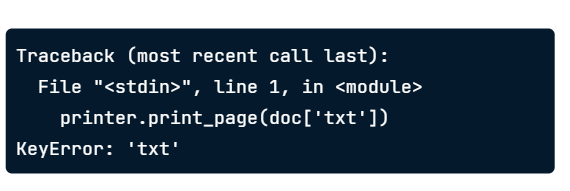

One way to handle this is to use the Try sequence where the code that might raise an error is tried, if an error does occur the Except code is run and the Finally code is always run, whether an error occurs or not. 

In [ ]:
try:
    # try the code that may fail

except:
    # do something about the error
    
finally:
    # this code runs no matter what

When applied to the get_printer() function, the user will still get the same error, but this time the printer will be released. 

In [ ]:
def get_printer(ip):
    p = connect_to_printer(ip)
    try:
    yield
    finally:
    p.disconnect()
    print('Disconnected from the printer')
    
doc = {text: 'this is my text'}

with get_printer(192.168.0.1) as printer:
    printer.print_page(doc['txt'])
    
doc = {text: 'this is my text'}

with get_printer(192.168.0.1) as printer:
    printer.print_page(doc['txt'])

#### Context Manager Patterns

If the code is using of these patterns, a context manager should be considered:
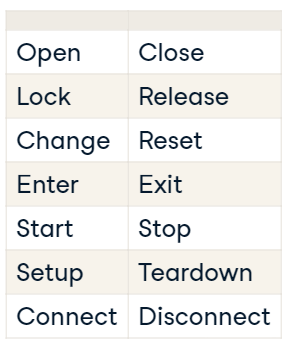

### Exercise 3

#### Scraping the NASDAQ
Training deep neural nets is expensive! You might as well invest in NVIDIA stock since you're spending so much on GPUs. To pick the best time to invest, you are going to collect and analyze some data on how their stock is doing. The context manager stock('NVDA') will connect to the NASDAQ and return an object that you can use to get the latest price by calling its .price() method.

You want to connect to stock('NVDA') and record 10 timesteps of price data by writing it to the file NVDA.txt.

__Instructions:__
* Use the stock('NVDA') context manager and assign the result to nvda.
* Open a file for writing with open('NVDA.txt', 'w') and assign the file object to f_out so you can record the price over time.

In [ ]:
# Use the "stock('NVDA')" context manager
# and assign the result to the variable "nvda"
with stock('NVDA') as nvda:
  # Open "NVDA.txt" for writing as f_out
  with open('NVDA.txt','w') as f_out:
    for _ in range(10):
      value = nvda.price()
      print('Logging ${:.2f} for NVDA'.format(value))
      f_out.write('{:.2f}\n'.format(value))

#### Changing the working directory
You are using an open-source library that lets you train deep neural networks on your data. Unfortunately, during training, this library writes out checkpoint models (i.e., models that have been trained on a portion of the data) to the current working directory. You find that behavior frustrating because you don't want to have to launch the script from the directory where the models will be saved.

You decide that one way to fix this is to write a context manager that changes the current working directory, lets you build your models, and then resets the working directory to its original location. You'll want to be sure that any errors that occur during model training don't prevent you from resetting the working directory to its original location.

__Instructions:__
* Add a statement that lets you handle any errors that might occur inside the context.
* Add a statement that ensures os.chdir(current_dir) will be called, whether there was an error or not.

In [20]:
def in_dir(directory):
  """Change current working directory to `directory`,
  allow the user to run some code, and change back.

  Args:
    directory (str): The path to a directory to work in.
  """
  current_dir = os.getcwd()
  os.chdir(directory)

  # Add code that lets you handle errors
  try:
    yield
  # Ensure the directory is reset,
  # whether there was an error or not
  finally:
    os.chdir(current_dir)